In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/co2_emissions_kt_by_country.csv")
country_mapping = pd.read_csv("data/continents2.csv")

In [3]:
df.tail()

,country_code,country_name,year,value
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114
13952,ZWE,Zimbabwe,2019,11760.000229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [5]:
df.isnull().sum()


country_code    0
country_name    0
year            0
value           0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

# EDA

In [7]:
country_mapping = country_mapping.rename(columns={"name": "country_name"})

In [8]:
country_mapping.head()

,country_name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [9]:
df = df.merge(country_mapping, on="country_name")
df = df.drop(["alpha-2", "alpha-3", "iso_3166-2", "region-code", "sub-region-code", "intermediate-region-code", "country-code"], axis=1)
df.tail()

,country_code,country_name,year,value,region,sub-region,intermediate-region
9598,ZWE,Zimbabwe,2015,12430.000305,Africa,Sub-Saharan Africa,Eastern Africa
9599,ZWE,Zimbabwe,2016,11020.000458,Africa,Sub-Saharan Africa,Eastern Africa
9600,ZWE,Zimbabwe,2017,10340.000153,Africa,Sub-Saharan Africa,Eastern Africa
9601,ZWE,Zimbabwe,2018,12380.000114,Africa,Sub-Saharan Africa,Eastern Africa
9602,ZWE,Zimbabwe,2019,11760.000229,Africa,Sub-Saharan Africa,Eastern Africa


In [10]:
average_per_country = df.groupby('country_name')["value"].mean().reset_index()

regions = df[['country_name', 'region']].drop_duplicates()
average_per_country = average_per_country.merge(regions, on="country_name")
average_per_region = average_per_country.groupby("region")["value"].mean().reset_index()
average_per_region

,region,value
0,Africa,12281.684442
1,Americas,168496.030956
2,Asia,176726.829814
3,Europe,107897.432022
4,Oceania,19506.040739


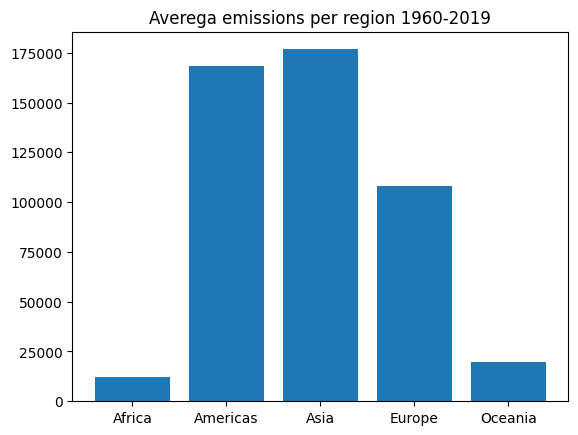

In [11]:
import matplotlib.pyplot as plt

plt.bar(average_per_region["region"], average_per_region["value"])
plt.title("Averega emissions per region 1960-2019")
plt.show()

In [12]:
first_20 = df[df["year"] <= 1980]
mid_20 = df[df["year"] <= 2000]
last_20 = df[df["year"] <= 2020]

first_20 = first_20.groupby("region")["value"].mean().reset_index()
mid_20 = mid_20.groupby("region")["value"].mean().reset_index()
last_20 = last_20.groupby("region")["value"].mean().reset_index()

means_per_20 = {"first_20": first_20,
                "mid_20": mid_20,
                "last_20": last_20}


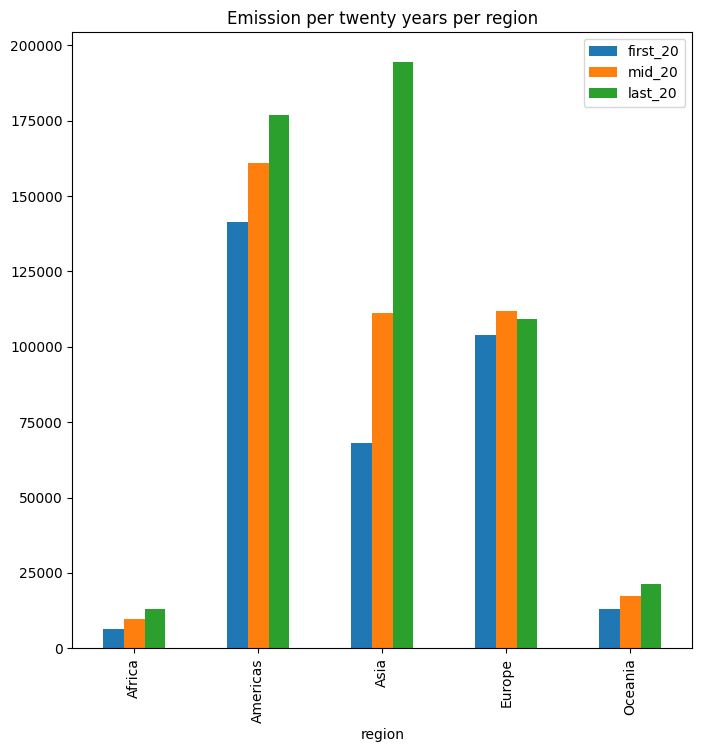

In [13]:
merged_df = first_20.merge(mid_20, on="region").merge(last_20, on="region")
merged_df.rename(columns={"value_x": "first_20", "value_y": "mid_20", "value": "last_20"}, inplace=True)
merged_df.set_index("region", inplace=True)
merged_df.plot(kind='bar', figsize=(8,8))

plt.title("Emission per twenty years per region")
plt.show()

In [14]:
top_10 = average_per_country.sort_values('value').tail(10)

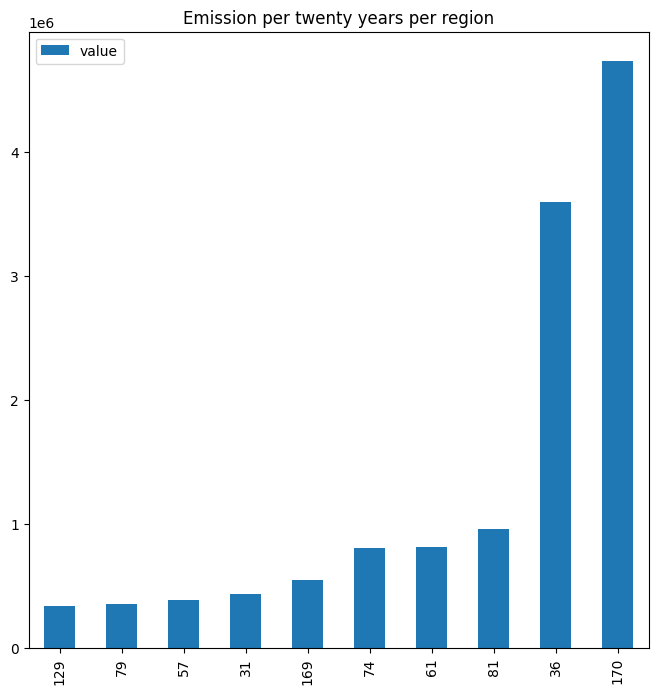

In [15]:
# top_10.set_index("country_name", inplace=True)
top_10.plot(kind='bar', figsize=(8,8))


plt.title("Emission per twenty years per region")
plt.show()

In [16]:
# growth rates

df["growth_rate"] = df['value'].pct_change(periods=1) 
gr_top_10 = df.groupby("country_name")["growth_rate"].mean().reset_index()
gr_top_10 = gr_top_10.sort_values("growth_rate", ascending=False).head(10)

In [17]:
df.sort_values("growth_rate", ascending=False).head(20)

gr_df = df[df["year"] > 1960]
gr_df.sort_values("growth_rate", ascending=False).head(20)

,country_code,country_name,year,value,region,sub-region,intermediate-region,growth_rate
5558,MHL,Marshall Islands,1992,80.000000,Oceania,Micronesia,NaN,inf
7043,PLW,Palau,1992,200.000000,Oceania,Micronesia,NaN,inf
2699,ERI,Eritrea,1992,440.000000,Africa,Sub-Saharan Africa,Eastern Africa,inf
8695,TLS,Timor-Leste,2002,170.000002,Asia,South-eastern Asia,NaN,inf
5623,MLI,Mali,1997,10.000000,Africa,Sub-Saharan Africa,Western Africa,inf
2307,DEU,Germany,1990,955310.000000,Europe,Western Europe,NaN,131.866480
9073,UKR,Ukraine,1990,688620.000000,Europe,Eastern Europe,NaN,116.511943
8028,SRB,Serbia,1990,61910.000000,Europe,Southern Europe,NaN,88.724638
5624,MLI,Mali,1998,770.000000,Africa,Sub-Saharan Africa,Western Africa,76.000000
5177,LTU,Lithuania,1990,32220.000000,Europe,Northern Europe,NaN,40.844157


In [18]:
top_10

,country_name,value,region
129,Poland,3.323509e+05,Europe
79,Italy,3.539251e+05,Europe
57,France,3.826785e+05,Europe
31,Canada,4.348921e+05,Americas
169,United Kingdom,5.464374e+05,Europe
74,India,8.028125e+05,Asia
61,Germany,8.122340e+05,Europe
81,Japan,9.543470e+05,Asia
36,China,3.599958e+06,Asia
170,United States,4.733944e+06,Americas


In [19]:
avg_emission = df.groupby("country_name")['value'].mean().reset_index()
top_10 = avg_emission.nlargest(5, "value")
top_10_trend  = df[df["country_name"].isin(top_10["country_name"])]

In [20]:
top_10_trend

,country_code,country_name,year,value,region,sub-region,intermediate-region,growth_rate
1770,CHN,China,1960,7.807263e+05,Asia,Eastern Asia,NaN,7.544668
1771,CHN,China,1961,5.520668e+05,Asia,Eastern Asia,NaN,-0.292880
1772,CHN,China,1962,4.403590e+05,Asia,Eastern Asia,NaN,-0.202345
1773,CHN,China,1963,4.366957e+05,Asia,Eastern Asia,NaN,-0.008319
1774,CHN,China,1964,4.369230e+05,Asia,Eastern Asia,NaN,0.000521
...,...,...,...,...,...,...,...,...
9218,USA,United States,2015,4.990710e+06,Americas,Northern America,NaN,-0.022811
9219,USA,United States,2016,4.894500e+06,Americas,Northern America,NaN,-0.019278
9220,USA,United States,2017,4.819370e+06,Americas,Northern America,NaN,-0.015350
9221,USA,United States,2018,4.975310e+06,Americas,Northern America,NaN,0.032357


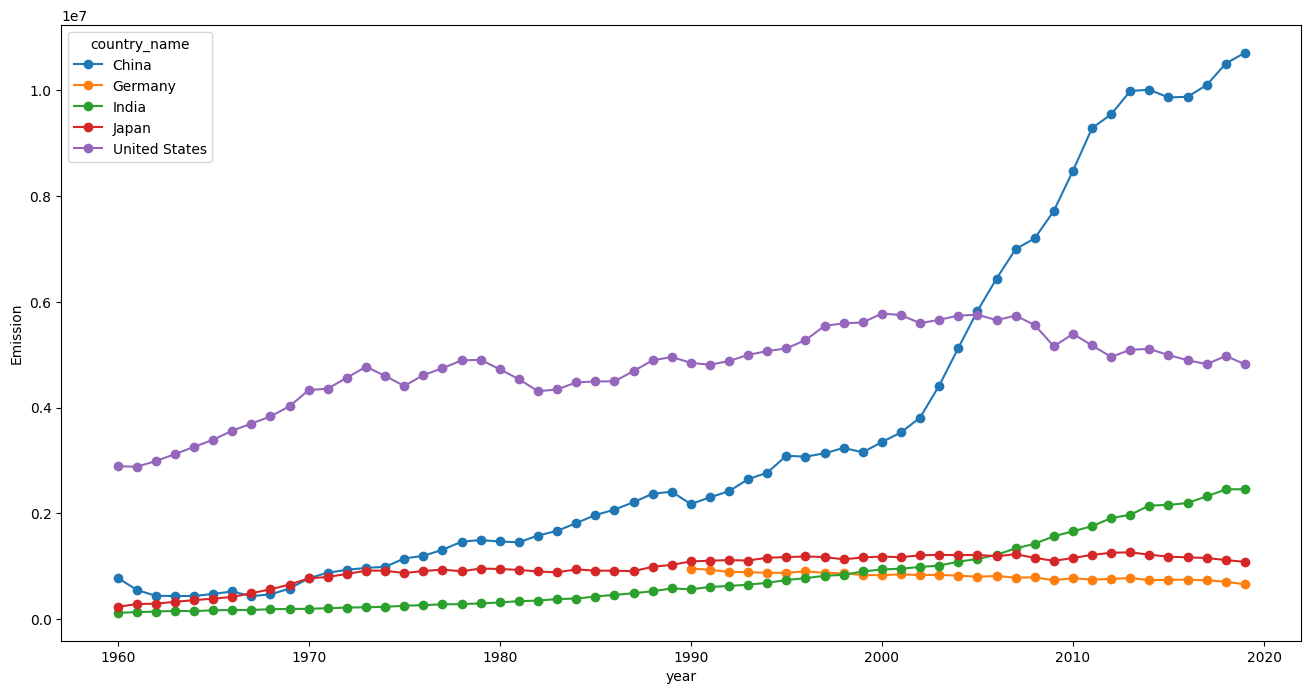

In [21]:
grouped = top_10_trend.groupby("country_name")

plt.figure(figsize=(16,8))

for name, group in grouped:
    plt.plot(group["year"], group["value"], marker='o', label=name)

plt.xlabel("year")
plt.ylabel("Emission")
plt.legend(title="country_name")
plt.show()

# Correlation analysis

In [22]:
gdp = pd.read_csv("data/gdp/gdp_data.csv", skiprows=4) # gdp is per capita
gdp.drop(columns=["Indicator Name", "Indicator Code"], inplace=True)
gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN,NaN
1,Africa Eastern and Southern,AFE,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,214.666914,226.978859,...,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN,NaN
3,Africa Western and Central,AFW,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,162.890667,145.568085,...,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620,NaN


In [122]:
gdp_pivoted = gdp.melt(id_vars=["Country Name", "Country Code"], var_name="year" , value_name="gdp")
gdp_pivoted.dropna(inplace=True)
gdp_pivoted.rename(columns={"Country Name": "country_name", "Country Code": "country_code"}, inplace=True)
gdp_pivoted.drop(columns="country_code" , inplace=True)

In [24]:

gdp_pivoted

,country_name,year,gdp
1,Africa Eastern and Southern,1960,162.342517
3,Africa Western and Central,1960,122.193931
13,Australia,1960,1810.597443
14,Austria,1960,943.610800
16,Burundi,1960,71.360224
...,...,...,...
17019,Kosovo,2023,5943.125714
17020,"Yemen, Rep.",2023,533.367123
17021,South Africa,2023,6253.161613
17022,Zambia,2023,1369.129365


In [28]:
gdp_pivoted["year"] =gdp_pivoted["year"].astype(int) 

In [29]:
df_new = df.merge(gdp_pivoted, on=["country_name", "year"], how='inner')


In [33]:
df_new

,country_code,country_name,year,value,region,sub-region,intermediate-region,growth_rate,gdp
0,ABW,Aruba,1986,179.683000,Americas,Latin America and the Caribbean,Caribbean,-0.989301,6283.001443
1,ABW,Aruba,1987,447.374000,Americas,Latin America and the Caribbean,Caribbean,1.489796,7567.253642
2,ABW,Aruba,1988,612.389000,Americas,Latin America and the Caribbean,Caribbean,0.368852,9274.514156
3,ABW,Aruba,1989,649.059000,Americas,Latin America and the Caribbean,Caribbean,0.059880,10767.396220
4,ABW,Aruba,1990,487.711000,Americas,Latin America and the Caribbean,Caribbean,-0.248588,11638.733706
...,...,...,...,...,...,...,...,...,...
8575,ZWE,Zimbabwe,2015,12430.000305,Africa,Sub-Saharan Africa,Eastern Africa,0.028974,1410.329173
8576,ZWE,Zimbabwe,2016,11020.000458,Africa,Sub-Saharan Africa,Eastern Africa,-0.113435,1421.787791
8577,ZWE,Zimbabwe,2017,10340.000153,Africa,Sub-Saharan Africa,Eastern Africa,-0.061706,1192.107012
8578,ZWE,Zimbabwe,2018,12380.000114,Africa,Sub-Saharan Africa,Eastern Africa,0.197292,2269.177012


In [31]:
china = df_new[df_new["country_code"] == "CHN"]
corr = china["gdp"].corr(china["value"])
corr

0.9420201077980793

In [120]:
df_new[df_new["country_name"] == "Germany"]

,country_code,country_name,year,value,region,sub-region,intermediate-region,growth_rate,gdp
1957,DEU,Germany,1990,955310.000000,Europe,Western Europe,NaN,131.866480,22303.961327
1958,DEU,Germany,1991,932550.000000,Europe,Western Europe,NaN,-0.023825,23357.757725
1959,DEU,Germany,1992,892820.000000,Europe,Western Europe,NaN,-0.042604,26438.230389
1960,DEU,Germany,1993,887060.000000,Europe,Western Europe,NaN,-0.006451,25522.629573
1961,DEU,Germany,1994,875900.000000,Europe,Western Europe,NaN,-0.012581,27076.606750
1962,DEU,Germany,1995,874660.000000,Europe,Western Europe,NaN,-0.001416,31658.349379
1963,DEU,Germany,1996,904340.000000,Europe,Western Europe,NaN,0.033933,30485.866548
1964,DEU,Germany,1997,872650.000000,Europe,Western Europe,NaN,-0.035042,26964.049467
1965,DEU,Germany,1998,865250.000000,Europe,Western Europe,NaN,-0.008480,27289.059360
1966,DEU,Germany,1999,833590.000000,Europe,Western Europe,NaN,-0.036591,26734.942537


In [70]:
correlation_df  = df_new.groupby("country_name").apply(lambda x: x["gdp"].corr(x["value"])).reset_index()
correlation_df.columns = ["country_name", "correlation"]
correlation_df.sort_values(by="correlation",ascending=False)
# correlation_df 

,country_name,correlation
107,Morocco,0.986433
97,Maldives,0.983408
73,India,0.982554
126,Peru,0.981091
138,Seychelles,0.980315
...,...,...
151,Sweden,-0.752593
71,Hungary,-0.796212
163,Tuvalu,-0.815632
167,United Kingdom,-0.819663


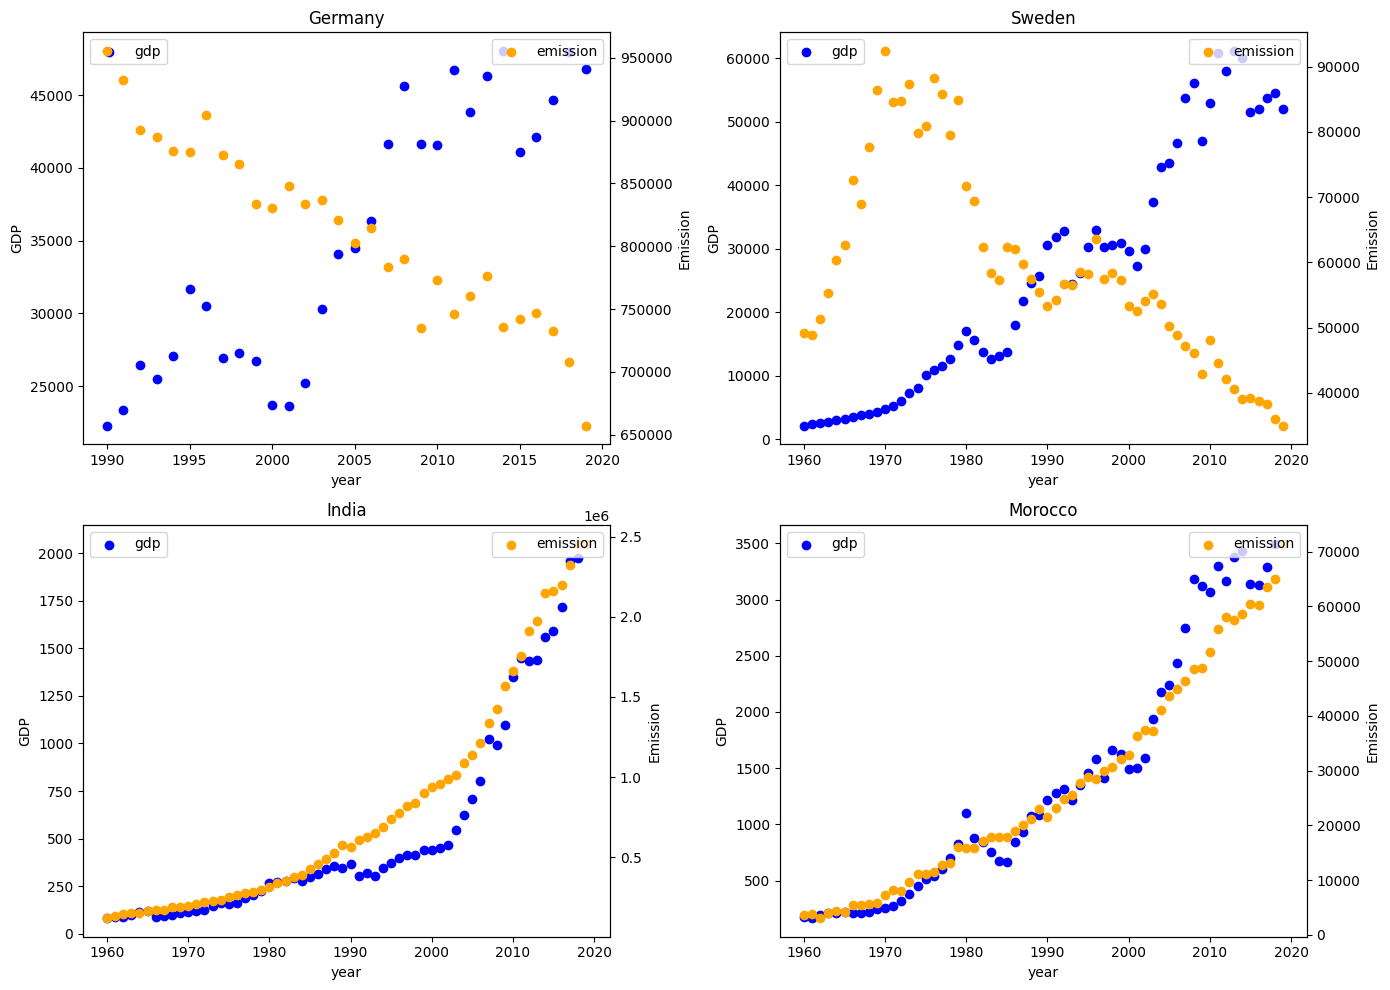

In [117]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

countries = ["Germany", "Sweden" , "India", "Morocco"]
axs = axs.flatten()
for i , country in enumerate(countries):
    country_data = df_new[df_new["country_name"] == country]
    ax1 = axs[i]
    ax2 = ax1.twinx()
    ax1.scatter(country_data["year"], country_data["gdp"], label=f"gdp", color='b')
    ax2.scatter(country_data["year"], country_data["value"], label=f"emission", color='orange')

    ax1.set_title(country)
    ax1.set_xlabel("year")
    ax1.set_ylabel("GDP")
    ax2.set_ylabel("Emission")
    ax1.legend(loc=0)
    ax2.legend(loc=1)

plt.tight_layout()
plt.show()
